In [1]:
import json

#function to clean user data
def clean_user_data(user):
    cleaned_user = {
        'id': user['id'],
        'name': user.get('name', ''),
        'screen_name': user.get('screen_name', ''),
        'location': user.get('location', ''),
        'url': user.get('url', ''),
        'followers_count': user.get('followers_count', 0),
        'friends_count': user.get('friends_count', 0),
        'statuses_count': user.get('statuses_count', 0),
        'favourites_count': user.get('favourites_count', 0),
        'verified': user.get('verified', False),
        'created_at': user.get('created_at', ''),
        'profile_image_url': user.get('profile_image_url', ''),
        'geo_enabled': user.get('geo_enabled', ''),
        'profile_picture': user.get('profile_picture', ''),
    }
    return cleaned_user

# function to clean tweet data
def clean_tweet_data(tweet):
    cleaned_tweet = {
        'id': tweet['id'],
        'text': tweet.get('text', ''),
        'created_at': tweet.get('created_at', ''),
        'user_id': tweet['user']['id'],
        'hashtags': [hashtag['text'] for hashtag in tweet.get('entities', {}).get('hashtags', [])],
        'urls': [url['expanded_url'] for url in tweet.get('entities', {}).get('urls', [])],
        'retweet_count': tweet.get('retweet_count', 0),
        'reply_count': tweet.get('reply_count', 0),
        'favorite_count': tweet.get('favorite_count', 0),
        'is_retweet': 'retweeted_status' in tweet,
        'retweeted_status': 'retweeted_status' in tweet,
        'retweet_id': 'retweet_id' in tweet,
        'lang': 'lang' in tweet,
        'source': 'source' in tweet,
    }
    return cleaned_tweet


# function to process tweets and save cleaned data
def process_and_save_tweets(file_path):
    users = {}
    tweets = []

    with open(file_path, 'r') as file:
        for line in file:
            try:
                tweet = json.loads(line)
                cleaned_user = clean_user_data(tweet['user'])
                users[cleaned_user['id']] = cleaned_user  # Ensures unique users
                
                cleaned_tweet = clean_tweet_data(tweet)
                tweets.append(cleaned_tweet)
            except json.JSONDecodeError:
                continue  # Silently skip over lines that can't be parsed

    # Saving cleaned data to files
    with open('cleaned_users.json', 'w') as users_file:
        json.dump(list(users.values()), users_file, indent=4)
    
    with open('cleaned_tweets.json', 'w') as tweets_file:
        json.dump(tweets, tweets_file, indent=4)


if __name__ == '__main__':
    data_file_path = '/Users/ojassharma/Desktop/RUTGERS 1/SEM-2/DBMS/MAJOR PROJECT/corona-out-3'
    process_and_save_tweets(data_file_path)


In [2]:
import pandas as pd

# Load data into pandas DataFrames
tweets_df = pd.read_json('/Users/ojassharma/Desktop/RUTGERS 1/SEM-2/DBMS/MAJOR PROJECT/cleaned_tweets.json')
users_df = pd.read_json('/Users/ojassharma/Desktop/RUTGERS 1/SEM-2/DBMS/MAJOR PROJECT/cleaned_users.json')

# Print the column names of the DataFrames
print("Tweets data columns are:", tweets_df.columns)
print("Users data columns are:", users_df.columns)



Tweets data columns are: Index(['id', 'text', 'created_at', 'user_id', 'hashtags', 'urls',
       'retweet_count', 'reply_count', 'favorite_count', 'is_retweet',
       'retweeted_status', 'retweet_id', 'lang', 'source'],
      dtype='object')
Users data columns are: Index(['id', 'name', 'screen_name', 'location', 'url', 'followers_count',
       'friends_count', 'statuses_count', 'favourites_count', 'verified',
       'created_at', 'profile_image_url', 'geo_enabled', 'profile_picture'],
      dtype='object')


In [3]:
import json

# Function to read and return the content of a JSON file
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Paths to the saved files
users_file_path = 'cleaned_users.json'
tweets_file_path = 'cleaned_tweets.json'

# Reading the files
users_data = read_json_file(users_file_path)
tweets_data = read_json_file(tweets_file_path)

# Printing the first few entries to verify
print("First few users:", users_data[:5])
print("First few tweets:", tweets_data[:5])


First few users: [{'id': 804046791348015107, 'name': 'Bi Sex Uau', 'screen_name': 'B_King69', 'location': 'Acre, Brasil', 'url': 'https://www.instagram.com/?hl=pt-br', 'followers_count': 89, 'friends_count': 173, 'statuses_count': 4728, 'favourites_count': 5446, 'verified': False, 'created_at': 'Wed Nov 30 19:37:48 +0000 2016', 'profile_image_url': 'http://pbs.twimg.com/profile_images/1210794971231477761/hLtokcV-_normal.jpg', 'geo_enabled': False, 'profile_picture': ''}, {'id': 2242948745, 'name': 'Thomas Krause', 'screen_name': 'tho1965', 'location': None, 'url': None, 'followers_count': 173, 'friends_count': 685, 'statuses_count': 1865, 'favourites_count': 2184, 'verified': False, 'created_at': 'Wed Dec 25 09:13:33 +0000 2013', 'profile_image_url': 'http://pbs.twimg.com/profile_images/1235271878132060161/v6QDnXLL_normal.jpg', 'geo_enabled': True, 'profile_picture': ''}, {'id': 908326492718764034, 'name': 'शचीन्द्र पाण्डेय', 'screen_name': 'im_S_pandey', 'location': 'Amethi Uttar Prad

In [4]:
from IPython.display import display
import pandas as pd

# Displaying Users DataFrame
print("Users DataFrame:")
display(users_df)  

# Displaying Tweets DataFrame
print("Tweets DataFrame:")
display(tweets_df)

Users DataFrame:


,id,name,screen_name,location,url,followers_count,friends_count,statuses_count,favourites_count,verified,created_at,profile_image_url,geo_enabled,profile_picture
0,804046791348015107,Bi Sex Uau,B_King69,"Acre, Brasil",https://www.instagram.com/?hl=pt-br,89,173,4728,5446,False,2016-11-30 19:37:48+00:00,http://pbs.twimg.com/profile_images/1210794971...,False,
1,2242948745,Thomas Krause,tho1965,None,None,173,685,1865,2184,False,2013-12-25 09:13:33+00:00,http://pbs.twimg.com/profile_images/1235271878...,True,
2,908326492718764034,शचीन्द्र पाण्डेय,im_S_pandey,Amethi Uttar Pradesh,None,2364,202,49028,30680,False,2017-09-14 13:48:06+00:00,http://pbs.twimg.com/profile_images/1252819913...,True,
3,2929344220,Ralf Schmitz,RusticusArat,🇩4790 Provinz,None,778,733,30551,32024,False,2014-12-18 10:19:26+00:00,http://pbs.twimg.com/profile_images/1103690114...,False,
4,1206650133976408064,Büşra Öztaş,schrodingerk42,None,None,318,220,405,1974,False,2019-12-16 18:59:53+00:00,http://pbs.twimg.com/profile_images/1252587987...,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80938,92819550,santosh,skpandey77,"Thanjavur, India",None,24,34,309,534,False,2009-11-26 19:32:02+00:00,http://abs.twimg.com/sticky/default_profile_im...,False,
80939,2279976427,Venugopi,Venu7630,None,None,3,35,42,83,False,2014-01-07 03:50:17+00:00,http://pbs.twimg.com/profile_images/8105151614...,False,
80940,4890378807,𝔻𝕒𝕪𝕤𝕖 gab.ai/AvelarDayse,AvelarDayse,Brazil,None,3020,2306,12704,29381,False,2016-02-09 01:38:25+00:00,http://pbs.twimg.com/profile_images/1171394214...,False,
80941,872453029,R.A.shah,Rashah007,"Lucknow, India",None,881,1921,9514,22823,False,2012-10-10 20:23:59+00:00,http://pbs.twimg.com/profile_images/1247942466...,True,


Tweets DataFrame:


,id,text,created_at,user_id,hashtags,urls,retweet_count,reply_count,favorite_count,is_retweet,retweeted_status,retweet_id,lang,source
0,1254022770679320576,"É isto, ou vou morrer sem ar ou com o corona h...",2020-04-25 12:21:41+00:00,804046791348015107,[],[],0,0,0,False,False,False,True,True
1,1254022770746372096,Schöne Runde mit dem Rennrad ✌️\n#sport #coron...,2020-04-25 12:21:41+00:00,2242948745,"[sport, corona]",[],0,0,0,False,False,False,True,True
2,1254022772558368768,RT @BJP4India: India’s war with Corona is ongo...,2020-04-25 12:21:42+00:00,908326492718764034,[],[],0,0,0,True,True,False,True,True
3,1254022772575043586,Was sollen 150 Euro Computerzuschuss bringen? ...,2020-04-25 12:21:42+00:00,2929344220,[],[https://twitter.com/i/web/status/125402277257...,0,0,0,False,False,False,True,True
4,1254022772877131777,RT @schrodingerk42: @ozkan_yalim @DurmusYillma...,2020-04-25 12:21:42+00:00,1206650133976408064,[],[],0,0,0,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101911,1254059751379361793,@VSReddy_MP I think wantedly you ate damaging ...,2020-04-25 14:48:38+00:00,2279976427,[],[https://twitter.com/i/web/status/125405975137...,0,0,0,False,False,False,True,True
101912,1254059751949942784,RT @DeepStateExpose: RETWEET! 5G is the real s...,2020-04-25 14:48:38+00:00,4890378807,[],[],0,0,0,True,True,False,True,True
101913,1254059752134455296,RT @bongofive: Diamond atangaza kuzilipia kodi...,2020-04-25 14:48:38+00:00,1196389874351431680,[],[http://bongo5.com/diamond-atangaza-kuzilipia-...,0,0,0,True,True,False,True,True
101914,1254059751945596930,RT @AjeetSonwarsha: “धार्मिक” एक्सपर्ट लोगों स...,2020-04-25 14:48:38+00:00,872453029,[],[],0,0,0,True,True,False,True,True


In [5]:
# Assuming users_df and tweets_df are your Pandas DataFrames

# Total Unique Users
unique_users_count = users_df['id'].nunique()

# Total Tweets
total_tweets_count = tweets_df['id'].count()

# Hashtags and URLs usage
# Note: Assuming each tweet's hashtags and urls are stored in a list
hashtags_count = tweets_df['hashtags'].apply(lambda x: len(x)).sum()
urls_count = tweets_df['urls'].apply(lambda x: len(x)).sum()

print(f"Total Unique Users: {unique_users_count}")
print(f"Total Tweets: {total_tweets_count}")
print(f"Total Hashtags Used: {hashtags_count}")
print(f"Total URLs Included: {urls_count}")


Total Unique Users: 80943
Total Tweets: 101916
Total Hashtags Used: 45119
Total URLs Included: 32788


In [6]:
# Engagement metrics
average_retweets = tweets_df['is_retweet'].mean()
average_replies = tweets_df['reply_count'].mean()
average_favorites = tweets_df['favorite_count'].mean()

print(f"Average Retweets per Tweet: {average_retweets}")
print(f"Average Replies per Tweet: {average_replies}")
print(f"Average Favorites per Tweet: {average_favorites}")

Average Retweets per Tweet: 0.5995231367008125
Average Replies per Tweet: 0.0
Average Favorites per Tweet: 0.0


In [7]:
from IPython.display import display
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Assuming you have a DataFrame 'tweets_df' with a column 'text' containing the tweets.

# Calculate average tweet length (in characters)
average_tweet_length = tweets_df['text'].apply(len).mean()

# Most common words (excluding stopwords and special characters)
words = tweets_df['text'].apply(lambda x: word_tokenize(x.lower()))
words = words.explode()
# Filter out non-alphabetic tokens and stopwords
filtered_words = words[words.str.isalpha() & ~words.isin(stopwords.words('english'))]
most_common_words = filtered_words.value_counts().head(10)

display(f"Average Tweet Length: {average_tweet_length} characters")
display("Most Common Words:", most_common_words)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ojassharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ojassharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Average Tweet Length: 117.38896738490521 characters'

'Most Common Words:'

rt             61381
corona         54903
https          41998
de              8663
virus           8428
die             5145
coronavirus     4277
e               3425
que             3391
der             3335
Name: text, dtype: int64

In [8]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

# Tweets over time (e.g., by day)
tweets_over_time = tweets_df.set_index('created_at').resample('D').count()['id']

print("Tweets Over Time (by Day):")
print(tweets_over_time)

Tweets Over Time (by Day):
created_at
2020-04-25 00:00:00+00:00    101916
Freq: D, Name: id, dtype: int64


In [9]:
# Assuming 'location' field is present and populated
geographic_distribution = users_df['location'].value_counts().head(10)  # Top 10 locations

print("Geographic Distribution of Users:")
print(geographic_distribution)

Geographic Distribution of Users:
India                     1143
Indonesia                  735
New Delhi, India           510
United States              430
Mumbai, India              311
İstanbul, Türkiye          293
Deutschland                262
Chennai, India             237
Rio de Janeiro, Brasil     235
Lagos, Nigeria             228
Name: location, dtype: int64


/var/folders/_c/ngzs3cn54jn6yhs8fmcmpr180000gn/T/ipykernel_73607/3823908961.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/_c/ngzs3cn54jn6yhs8fmcmpr180000gn/T/ipykernel_73607/3823908961.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_countries)  # 'tab20' colormap with unique colors for each country


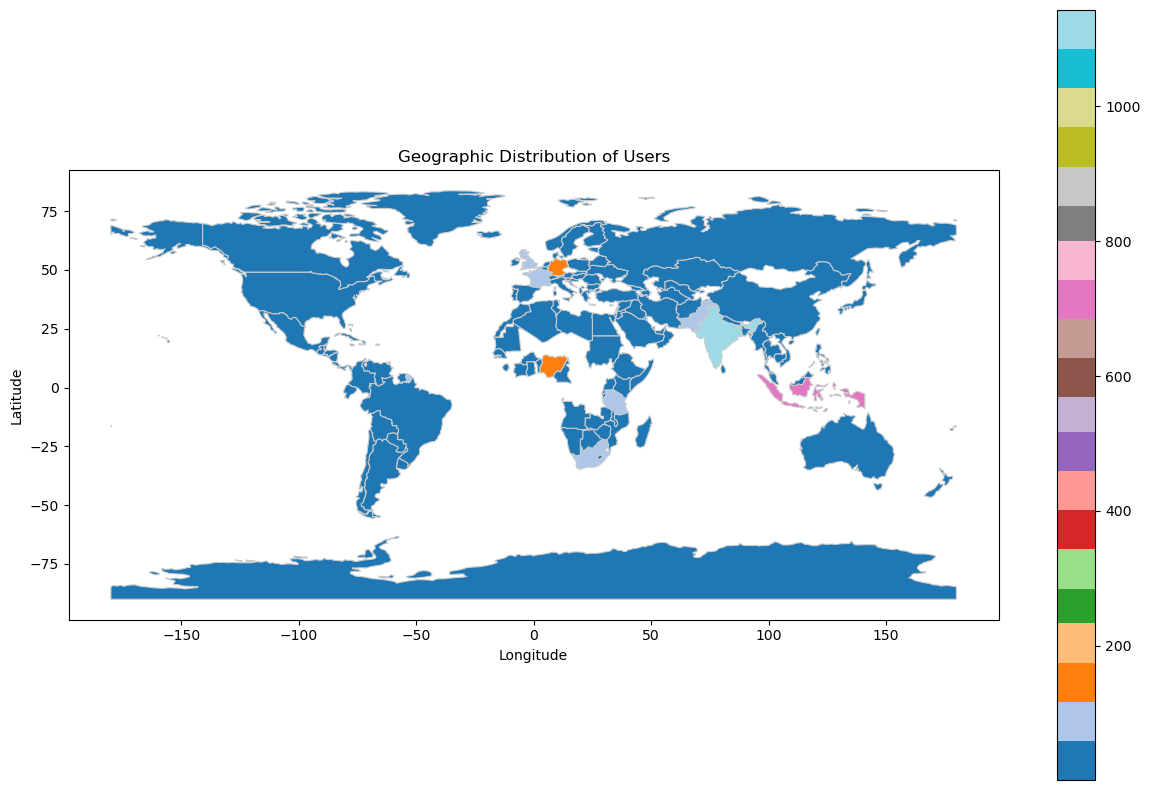

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a DataFrame with the geographic distribution data
geographic_distribution_df = users_df['location'].value_counts().reset_index()
geographic_distribution_df.columns = ['location', 'count']

# Merge the distribution data with the world map data
merged = world.merge(geographic_distribution_df, how='left', left_on='name', right_on='location')

# Create a categorical colormap with a unique color for each country
num_countries = len(merged['name'].unique())
cmap = plt.cm.get_cmap('tab20', num_countries)  # 'tab20' colormap with unique colors for each country
cmap_colors = cmap(range(num_countries))
cmap = ListedColormap(cmap_colors)

# Plot the map with the categorical colormap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='count', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
ax.set_title('Geographic Distribution of Users')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

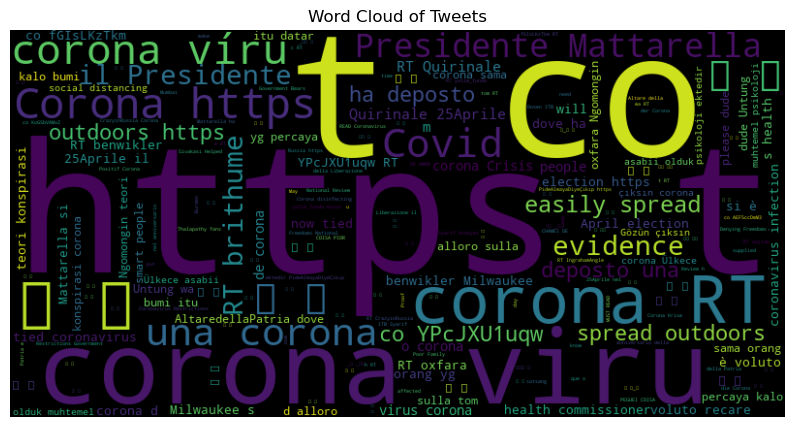

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all tweets into a single string
all_tweets_text = ' '.join(tweets_df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_tweets_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

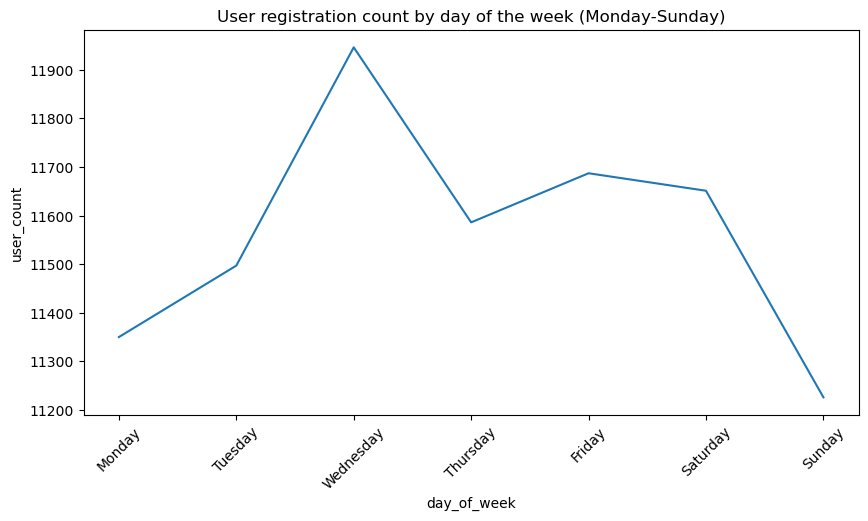

In [12]:
# Convert the 'created_at' column in users_df to datetime
users_df['created_at'] = pd.to_datetime(users_df['created_at'])

# Extract the day of the week
users_df['day_of_week'] = users_df['created_at'].dt.day_name()

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 5))
# Corrected to use users_df and group by the 'day_of_week'
users_daily = users_df.groupby(["day_of_week"])["id"].count().reset_index()
users_daily.columns = ['day_of_week', 'user_count']

# Sort the DataFrame by day of the week to ensure the plot is in the correct order
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
users_daily['day_of_week'] = pd.Categorical(users_daily['day_of_week'], categories=ordered_days, ordered=True)
users_daily = users_daily.sort_values('day_of_week')

sns.lineplot(x='day_of_week', y='user_count', data=users_daily)
plt.title('User registration count by day of the week (Monday-Sunday)')
plt.xticks(rotation=45)  # Improve readability of x-axis labels
plt.show()


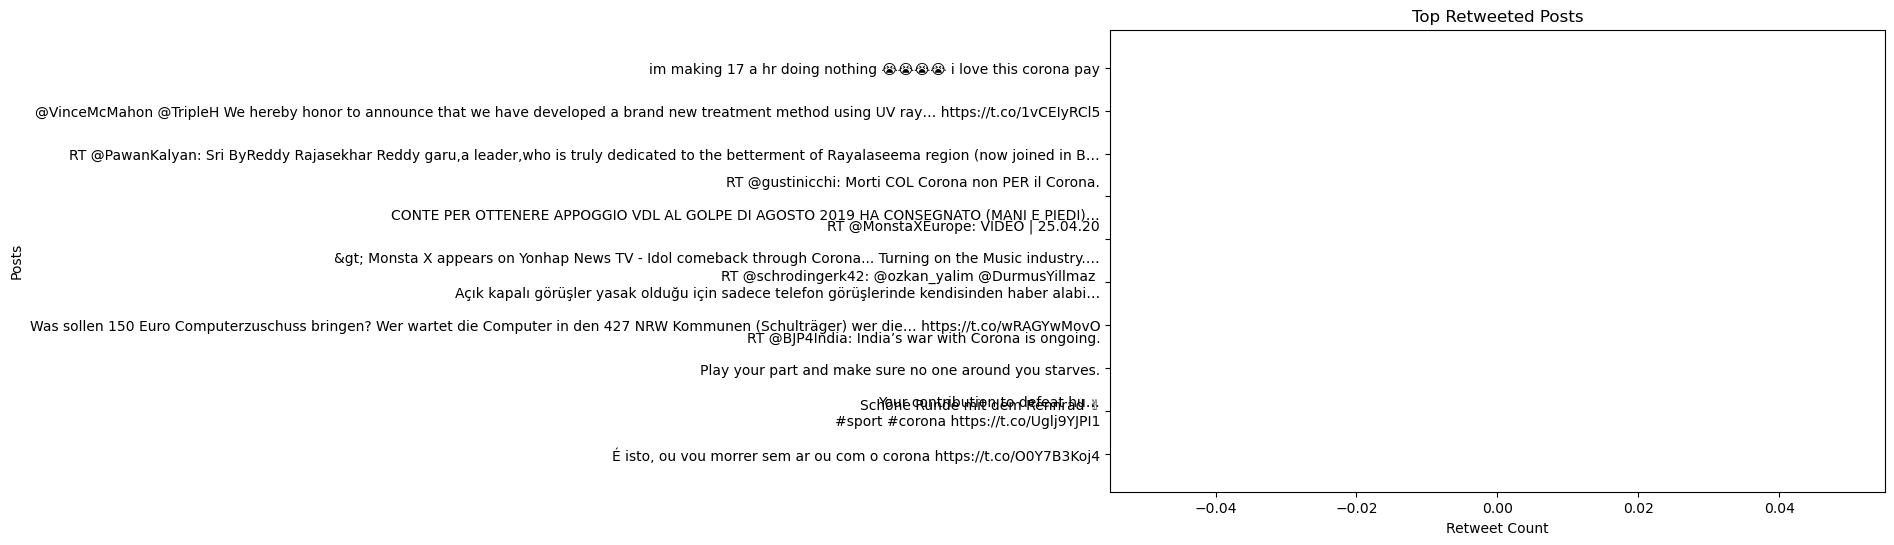

In [13]:
# Assuming 'retweet_count' and 'favorite_count' are columns in your DataFrame
import matplotlib.pyplot as plt
top_retweets = tweets_df.nlargest(10, 'retweet_count')
top_favorites = tweets_df.nlargest(10, 'favorite_count')

# Simple bar chart showing top retweeted posts
plt.figure(figsize=(10, 6))
plt.barh(top_retweets['text'], top_retweets['retweet_count'])
plt.title('Top Retweeted Posts')
plt.xlabel('Retweet Count')
plt.ylabel('Posts')
plt.show()

In [14]:
import ipywidgets as widgets
from ipywidgets import interact
from datetime import datetime

# Function to plot posts over time, adjusted to use two DatePicker widgets
def plot_posts_over_time(start_date, end_date):
    filtered_df = tweets_df[(tweets_df.index.date >= start_date) & (tweets_df.index.date <= end_date)]
    daily_counts = filtered_df.resample('D').size()
    
    plt.figure(figsize=(10, 5))
    daily_counts.plot()
    plt.title('Number of Posts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

start_date_picker = widgets.DatePicker(
    description='Start Date',
    value=datetime(2020, 1, 1).date(),
    disabled=False
)

end_date_picker = widgets.DatePicker(
    description='End Date',
    value=datetime(2020, 6, 30).date(),
    disabled=False
)

interact(plot_posts_over_time, start_date=start_date_picker, end_date=end_date_picker)

interactive(children=(DatePicker(value=datetime.date(2020, 1, 1), description='Start Date', step=1), DatePicke…

<function __main__.plot_posts_over_time(start_date, end_date)>